## PCA - KMeans Clustering and Logistic regression(failed) on miceprotein dataset

In [161]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings

warnings.filterwarnings('ignore') # We can suppress the warnings

## EDA (Exploratory Data Analysis) and Data Preparation:
Explore the dataset, give basic statistical information and visualize it (data exploratory analysis). You should plot the following graphs :
 - Give basic statistical information about the dataset
 - Investigate for null values and impute/clean using a suitable approach 

    -  **Hint 1**: Use *dropna* command from Pandas to drop certain rows and columns based on a threshold, set the parameter "thresh" so that get rid of columns and rows with high nan value percentage based on following rules:
      - Only keep columns with at least 90% non-NaN values (or in other words drop columns whose nan values account for more than 10 percent of rows)
      - Only keep rows with at least 75 non-NaN values
    -  **Hint 2**: Use SimpleImputer and "mean" strategy to impute nan values for numeric columns. Then, do a finale check and delete rows with nan values, if there is any left.

 - Visualize the distribution of classes

### Start coding:

In [3]:
# Load the data first:
mice = pd.read_csv('mice_protein_dataset.csv') # assuming that the data file is in your working folder

In [5]:
#The first look to dataset
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [7]:
#Checking datatypes and null values
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [9]:
#Basic statistical informations
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [11]:
#We do not need to ID column.
mice = mice.drop(columns = ['MouseID'])

In [13]:
#Removing null values from columns that has over %90 non-null values
mice = mice.dropna(axis=1,thresh=972)

In [15]:
#Removing null values from rows that has over 75 non-null values
mice = mice.dropna(axis=0,thresh=75)

In [17]:
#Checking whether is it worked succesfully
mice

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.962942,0.275547,0.115806,0.183324,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.983690,0.283207,0.113614,0.175674,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.976609,0.290843,0.118948,0.158296,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.989286,0.306701,0.125295,0.196296,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [19]:
#Again i wanted to check non-null value counts
mice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 0 to 1079
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1073 non-null   float64
 1   ITSN1_N          1073 non-null   float64
 2   BDNF_N           1073 non-null   float64
 3   NR1_N            1073 non-null   float64
 4   NR2A_N           1073 non-null   float64
 5   pAKT_N           1073 non-null   float64
 6   pBRAF_N          1073 non-null   float64
 7   pCAMKII_N        1073 non-null   float64
 8   pCREB_N          1073 non-null   float64
 9   pELK_N           1073 non-null   float64
 10  pERK_N           1073 non-null   float64
 11  pJNK_N           1073 non-null   float64
 12  PKCA_N           1073 non-null   float64
 13  pMEK_N           1073 non-null   float64
 14  pNR1_N           1073 non-null   float64
 15  pNR2A_N          1073 non-null   float64
 16  pNR2B_N          1073 non-null   float64
 17  pPKCAB_N         10

In [21]:
#The first 10 values
mice.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.843679,0.190469,0.106476,0.109446,0.439833,1.816389,Control,Memantine,C/S,c-CS-m
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.798284,0.181610,0.097834,0.111483,0.406293,1.528484,Control,Memantine,C/S,c-CS-m
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.843966,0.191561,0.099494,0.113080,0.382532,1.652658,Control,Memantine,C/S,c-CS-m
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.832182,0.186378,0.105145,0.105490,0.435687,1.834599,Control,Memantine,C/S,c-CS-m
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.803395,0.189523,0.093300,0.116906,0.414793,1.516862,Control,Memantine,C/S,c-CS-m


In [23]:
#The last 10 values
mice.tail(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
1070,0.355136,0.588026,0.314915,2.544507,3.981010,0.224713,0.178030,3.326520,0.241857,1.236318,...,0.893873,0.246714,0.124025,0.107092,0.394801,1.335982,Ts65Dn,Saline,S/C,t-SC-s
1071,0.318448,0.509701,0.290576,2.314752,3.041115,0.229135,0.175855,2.881429,0.206036,1.088389,...,0.881045,0.236307,0.127866,0.127265,0.405127,1.340743,Ts65Dn,Saline,S/C,t-SC-s
1072,0.333438,0.514353,0.316404,2.317035,3.451893,0.235962,0.201262,2.955047,0.215457,1.118612,...,0.861187,0.251357,0.117778,0.110314,0.395405,1.296917,Ts65Dn,Saline,S/C,t-SC-s
1073,0.280946,0.528821,0.299645,2.290991,3.243548,0.246021,0.195797,2.946067,0.221759,1.141400,...,0.871908,0.250431,0.122148,0.105369,0.408533,1.297315,Ts65Dn,Saline,S/C,t-SC-s
1074,0.230977,0.423589,0.254439,1.868897,2.447210,0.209734,0.150761,2.184052,0.187381,0.949746,...,0.976454,0.293754,0.117875,0.175592,0.389950,1.420244,Ts65Dn,Saline,S/C,t-SC-s
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.962942,0.275547,0.115806,0.183324,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.983690,0.283207,0.113614,0.175674,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.976609,0.290843,0.118948,0.158296,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.989286,0.306701,0.125295,0.196296,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s
1079,0.302626,0.461059,0.256564,2.092790,2.594348,0.251001,0.191811,2.361816,0.223632,1.064085,...,1.020383,0.292330,0.118899,0.187556,0.420347,1.370999,Ts65Dn,Saline,S/C,t-SC-s


In [25]:
mice.shape

(1073, 76)

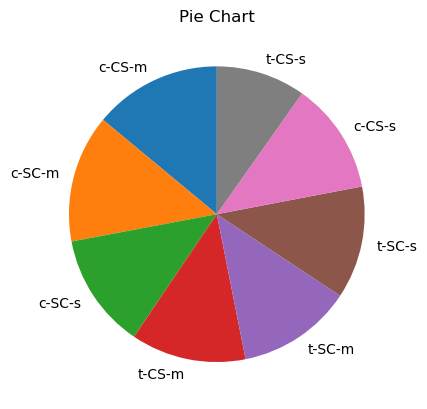

In [27]:
#Pie Chart to see class distrubitions
categories = mice['class']
category_counts = categories.value_counts()

labels = category_counts.index  
sizes = category_counts.values 

plt.pie(sizes, labels=labels, startangle=90)

plt.title('Pie Chart')

plt.show()

In [29]:
#Selecting numeric columns
numeric_columns = mice.select_dtypes(include='number').columns

In [31]:
#SimpleImputer to fill NaN values with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_values = imputer.fit_transform(mice[numeric_columns])
mice[numeric_columns] = pd.DataFrame(imputed_values, columns=numeric_columns)

null_count = mice.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 504


In [33]:
mice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 0 to 1079
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1066 non-null   float64
 1   ITSN1_N          1066 non-null   float64
 2   BDNF_N           1066 non-null   float64
 3   NR1_N            1066 non-null   float64
 4   NR2A_N           1066 non-null   float64
 5   pAKT_N           1066 non-null   float64
 6   pBRAF_N          1066 non-null   float64
 7   pCAMKII_N        1066 non-null   float64
 8   pCREB_N          1066 non-null   float64
 9   pELK_N           1066 non-null   float64
 10  pERK_N           1066 non-null   float64
 11  pJNK_N           1066 non-null   float64
 12  PKCA_N           1066 non-null   float64
 13  pMEK_N           1066 non-null   float64
 14  pNR1_N           1066 non-null   float64
 15  pNR2A_N          1066 non-null   float64
 16  pNR2B_N          1066 non-null   float64
 17  pPKCAB_N         10

## PCA and Cluster Analysis :
1 - Prepare the dataset for the cluster analysis
 - First, split the dataframe into independent variables and target variable which is 'class' column.
 - Drop categorical variables, we don't need them.
 - Scale the numeric variables

2 - Apply PCA and give the following information (using 10 principle components):
 - Explained variance ratio for each principal component, give values and plot bar graph
 - Cumulative explained variance, both give values and plot line graph of cumulative explained variance

3 - Apply K Means clustering and build the 'Elbow Curve'.

In [97]:
#For use the color map:
from matplotlib.colors import ListedColormap
PALETTE = sns.color_palette('deep', n_colors=2)
CMAP = ListedColormap(PALETTE.as_hex())

In [99]:
#Function to plot 2D 
def plot_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")

    plt.scatter(x, y,
        c=mice['class'],
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [35]:
#Dropping the categorical columns
mice = mice.drop(columns = ['Genotype','Treatment','Behavior'])

In [37]:
#features contains column names and target contains diagnosis column
features = mice.drop(columns='class').columns.tolist()
target = mice['class']

In [39]:
scaler = StandardScaler()
#Standard Scaling for features and assign it to new dataframe
mice = scaler.fit_transform(mice[features])

In [41]:
type(mice)

numpy.ndarray

In [43]:
#Here i saw a numpy array, not a dataframe so i need to convert it to pandas dataframe
#Again I dropped the target columns because of shape.
mice = pd.DataFrame(mice)

In [53]:
nan_rows = mice[mice.isna().any(axis=1)]
nan_rows

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
mice = mice.drop(1066)
mice = mice.drop(1067)
mice = mice.drop(1068)
mice = mice.drop(1069)
mice = mice.drop(1070)
mice = mice.drop(1071)
mice = mice.drop(1072)

In [73]:
target = pd.DataFrame(target)

In [79]:
nan_rows1 = target[target.isna().any(axis=1)]
nan_rows1

,class


In [81]:
#I added target column to scaled df, dfs.
mice['class'] = target['class']

In [125]:
pca = PCA()
points = pca.fit_transform(mice.drop(columns='class'))

In [127]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.73157845e-01, 1.64179072e-01, 1.09671977e-01, 7.52484810e-02,
       4.99564356e-02, 4.72557631e-02, 3.40179691e-02, 3.12014455e-02,
       2.32049283e-02, 1.73242292e-02, 1.47843146e-02, 1.28197168e-02,
       1.06445524e-02, 1.03101281e-02, 8.72927252e-03, 8.33048942e-03,
       7.00605730e-03, 6.71546084e-03, 5.96857488e-03, 5.85215473e-03,
       5.68384375e-03, 5.26128248e-03, 4.57770909e-03, 4.54604186e-03,
       4.02849448e-03, 3.82308037e-03, 3.52049764e-03, 3.32826462e-03,
       3.14242133e-03, 2.83589960e-03, 2.48554996e-03, 2.39164026e-03,
       2.36047680e-03, 2.32464276e-03, 2.02137173e-03, 1.95005817e-03,
       1.77569687e-03, 1.70339383e-03, 1.64179039e-03, 1.58382367e-03,
       1.52072428e-03, 1.50414051e-03, 1.39775010e-03, 1.23512675e-03,
       1.18201962e-03, 1.14104654e-03, 1.11071440e-03, 1.08777400e-03,
       9.91760637e-04, 9.66797156e-04, 8.55034184e-04, 8.13615218e-04,
       7.96020712e-04, 7.42904380e-04, 7.08006063e-04, 6.70840455e-04,
      

In [129]:
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {ratio:.4f}")

Explained Variance Ratio for each component:
Principal Component 1: 0.2732
Principal Component 2: 0.1642
Principal Component 3: 0.1097
Principal Component 4: 0.0752
Principal Component 5: 0.0500
Principal Component 6: 0.0473
Principal Component 7: 0.0340
Principal Component 8: 0.0312
Principal Component 9: 0.0232
Principal Component 10: 0.0173
Principal Component 11: 0.0148
Principal Component 12: 0.0128
Principal Component 13: 0.0106
Principal Component 14: 0.0103
Principal Component 15: 0.0087
Principal Component 16: 0.0083
Principal Component 17: 0.0070
Principal Component 18: 0.0067
Principal Component 19: 0.0060
Principal Component 20: 0.0059
Principal Component 21: 0.0057
Principal Component 22: 0.0053
Principal Component 23: 0.0046
Principal Component 24: 0.0045
Principal Component 25: 0.0040
Principal Component 26: 0.0038
Principal Component 27: 0.0035
Principal Component 28: 0.0033
Principal Component 29: 0.0031
Principal Component 30: 0.0028
Principal Component 31: 0.0025
Pri

In [157]:
#function gives us the most variance two columns
def pca(data, n):

    if type(n) == int:

        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca

    else:
        return data

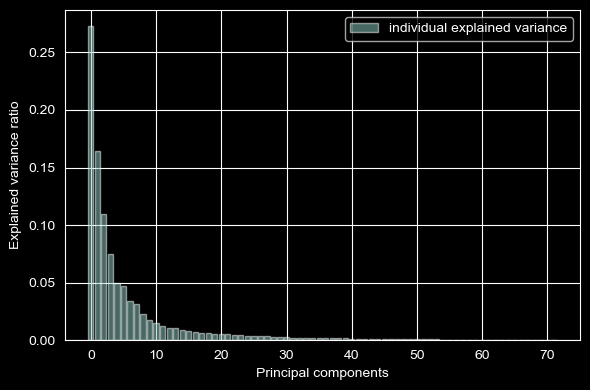

In [131]:
#Plotting explained variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(72), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [133]:
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.27315784 0.43733692 0.54700889 0.62225738 0.67221381 0.71946957
 0.75348754 0.78468899 0.80789392 0.82521815 0.84000246 0.85282218
 0.86346673 0.87377686 0.88250613 0.89083662 0.89784268 0.90455814
 0.91052671 0.91637887 0.92206271 0.92732399 0.9319017  0.93644774
 0.94047624 0.94429932 0.94781982 0.95114808 0.9542905  0.9571264
 0.95961195 0.96200359 0.96436407 0.96668871 0.96871008 0.97066014
 0.97243584 0.97413923 0.97578102 0.97736485 0.97888557 0.98038971
 0.98178746 0.98302259 0.98420461 0.98534566 0.98645637 0.98754414
 0.9885359  0.9895027  0.99035774 0.99117135 0.99196737 0.99271028
 0.99341828 0.99408912 0.99475165 0.99534755 0.99589666 0.99641249
 0.99691523 0.99739776 0.99782566 0.99820626 0.9985635  0.9989096
 0.99919042 0.99942533 0.99964075 0.99984832 1.         1.        ]


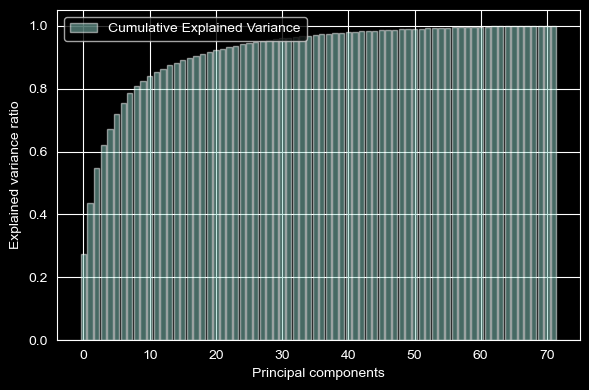

In [137]:
#Plotting cumulative variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(72), cumulative_variance, alpha=0.5, align='center',
            label='Cumulative Explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [171]:
df_pca = pd.DataFrame(mice, columns = ['0','1','2'])

In [141]:
#Function to Apply K Means clustering on the original features and build the ”Elbow Curve"
def cluster_Wcss(data, k ):

    wcss = []

    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

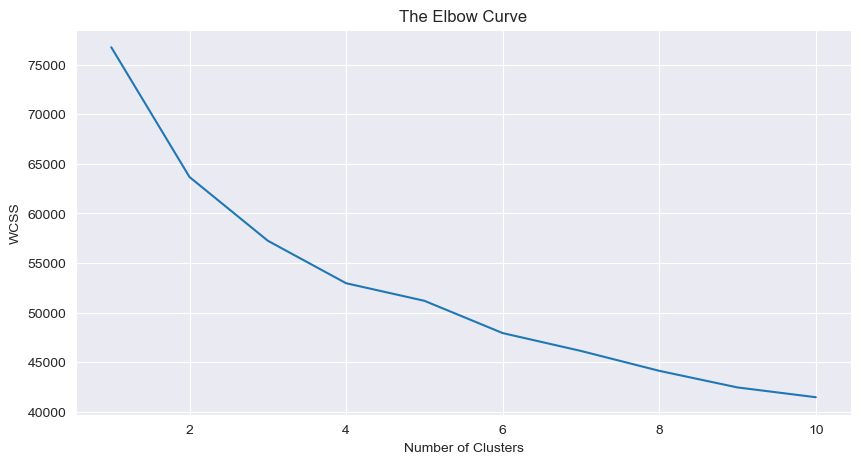

In [145]:
cluster_Wcss(mice.drop(columns = 'class'), 11)

## Creating The Best Scoring Model
 - Build best scoring model
     - For PCA, use parameters 3, 5, 7 and 10;
     - For K-means model use following parameters:

 	      - 'n_clusters' : with any number of clusters you want to try
 	      - 'init' : ['k-means++', 'random']
        - 'random_state' : [any number]
        
        then, print the best scoring parameters based on Silhouette Score,

 - Finally, build PCA transformation and train the K Means model using the best parameters based on Silhouette Score you have found
 - Visualize the clustering result by plotting a scatter plot using 2 PCA component using a different color for each cluster


In [149]:
#two lists (param_data and param_model), where each list contains dictionaries representing a unique combination of parameters.
param_data = { 'n' : [3,5,7,10,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = {
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++','random'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [151]:
param_data

[{'n': 3}, {'n': 5}, {'n': 7}, {'n': 10}, {'n': 'False'}]

In [153]:
#This function performs clustering using K-means with different combinations of PCA components and model parameters.
#For each combination, it computes metrics like Silhouette Score and Davies-Bouldin Index, and stores the results in a structured DataFrame
def cluster(data, param_data, param_model):

    last =[]

    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X)
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_

            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)

            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']

            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin

            last.append(res)

    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])

    return result

In [163]:
result =  cluster(mice.drop(columns = 'class'),  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
5,Kmeans,3,"{'n_clusters': 5, 'init': 'random', 'random_st...","[[-6.614223739067045, 0.07171078506036473, -0....",0.288660,1.109767
4,Kmeans,3,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[0.21540228247802484, -2.5983158917490052, -0...",0.287638,1.116921
2,Kmeans,3,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-6.553965181177438, 0.14020464141065483, -0....",0.282726,1.134614
3,Kmeans,3,"{'n_clusters': 4, 'init': 'random', 'random_st...","[[-6.553965181177438, 0.14020464141065483, -0....",0.282726,1.134614
1,Kmeans,3,"{'n_clusters': 3, 'init': 'random', 'random_st...","[[1.9452149724121905, -2.558242731998979, 0.07...",0.273184,1.254261


In [165]:
#I picked the best scoring parameters based on Silhouette Score
result.Params[5]

{'n_clusters': 5, 'init': 'random', 'random_state': 16}

In [167]:
# Best Results

bp = result.Params[5]
bn = result.Pca[5]
bc = result.Centers[5]

In [173]:
# Training the model with the best parameters

X = pca(mice.drop(columns = 'class'), bn)
X = pd.DataFrame(df_pca, columns = ['0','1','2'])

model = KMeans(**bp)

y_means = model.fit_predict(X)

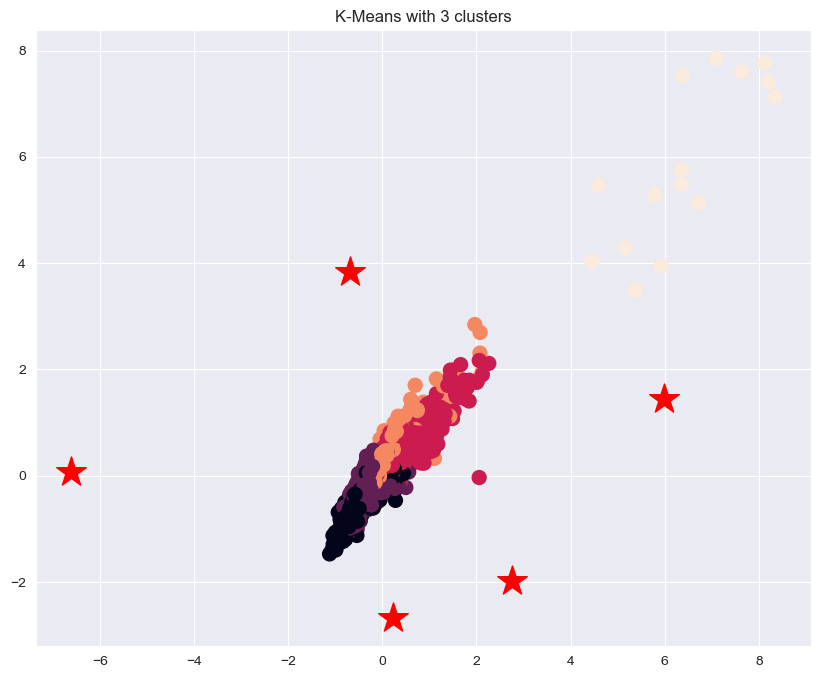

In [183]:
#Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('K-Means with 3 clusters')

plt.scatter(X['0'], X['1'], c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='red', marker='*', s=500)

## Build a classification model to predict target
     
Apply Logistic regression using:
 - First original features and build the model report the accuracy_score, confusion_matrix and classification_report
 - Then use dimension-reduced dataset with best number of principal components you have identified above; report the accuracy_score, confusion_matrix and classification_report; and finally compare the accuracy of two models and comment on the results


LR Model with original features:

In [185]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [187]:
#Original scaled features
X = mice.drop(['class'], axis=1)
y = mice['class']

In [189]:
#Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
#Score printer function - Accuracy, Classification Report and Confusion Matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [193]:
#Building model and showing scores
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

ValueError: Input contains NaN

LR Model trained with three PCA components:

In [195]:
X_2d = df_pca
y_2d = mice['class']

In [197]:
#Train | Test Split
X_trained, X_tested, y_trained, y_tested = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

In [199]:
##Building model and showing scores
lr_clf_2d = LogisticRegression(solver='liblinear')
lr_clf_2d.fit(X_trained, y_trained)

print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=True)
print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=False)

ValueError: Input contains NaN